# Importar librerías necesarias

In [37]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Analisis dataset homicidios

## <u>Carga del archivo<u>

Puesto que los archivos de excel contienen valores que han sido calculados mediante formulas, se procede a guardar las hojas necesarias en formato csv. <br>
Para poder analizar la información los datos se guarda dataframes correspondientes.

In [28]:
# Carga de cada archivo
df_hechos = pd.read_csv("datasets/hechos.csv")
df_victimas = pd.read_csv("datasets/victimas.csv")

Eliminando filas de datos vacios

In [29]:
# Dataframe de "hechos"
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    float64
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    float64
 4   MM                     696 non-null    float64
 5   DD                     696 non-null    float64
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    float64
 15  XY

In [30]:
# Eliminar filas donde todas las columnas tienen datos vacíos
df_hechos = df_hechos.dropna(how='all')
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    float64
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    float64
 4   MM                     696 non-null    float64
 5   DD                     696 non-null    float64
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    float64
 15  XY (CABA)  

In [31]:
# Dataframe de "victimas"
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_hecho             717 non-null    object 
 1   FECHA                717 non-null    object 
 2   AAAA                 717 non-null    float64
 3   MM                   717 non-null    float64
 4   DD                   717 non-null    float64
 5   ROL                  717 non-null    object 
 6   VICTIMA              717 non-null    object 
 7   SEXO                 717 non-null    object 
 8   EDAD                 717 non-null    object 
 9   FECHA_FALLECIMIENTO  717 non-null    object 
dtypes: float64(3), object(7)
memory usage: 56.4+ KB


In [32]:
# Eliminar filas donde todas las columnas tienen datos vacíos
df_victimas = df_victimas.dropna(how='all')
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_hecho             717 non-null    object 
 1   FECHA                717 non-null    object 
 2   AAAA                 717 non-null    float64
 3   MM                   717 non-null    float64
 4   DD                   717 non-null    float64
 5   ROL                  717 non-null    object 
 6   VICTIMA              717 non-null    object 
 7   SEXO                 717 non-null    object 
 8   EDAD                 717 non-null    object 
 9   FECHA_FALLECIMIENTO  717 non-null    object 
dtypes: float64(3), object(7)
memory usage: 61.6+ KB


Buscando duplicados en todas las columnas

In [33]:
# Para el dataframe "hechos"
df_hechos.duplicated().sum()

0

In [34]:
# Para el dataframe "victimas"
df_victimas.duplicated().sum()

0

## <u>EDA de hechos<u>

### *Resumen estadístico de la cantidad de victimas*

In [36]:
df_hechos["N_VICTIMAS"].describe()

count    696.000000
mean       1.030172
std        0.179393
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_VICTIMAS, dtype: float64

Debido a que existe una baja variabilidad en el número de víctimas, y que más del 75% de simiestros muestran que el promedio de victimas es uno, se procede a graficar la distribución del número de victimas por siniestro.

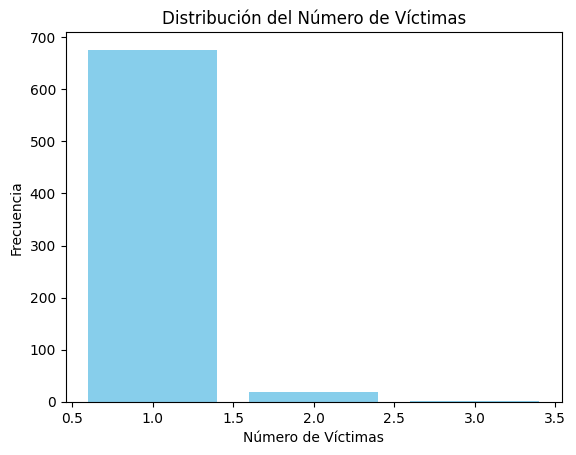

In [39]:
conteo_victimas = df_hechos['N_VICTIMAS'].value_counts().sort_index()

# Preparar los datos para el gráfico de barras
valores = conteo_victimas.index
frecuencias = conteo_victimas.values

# Crear el gráfico de barras
plt.bar(valores, frecuencias, color='skyblue')

# Añadir títulos y etiquetas
plt.title('Distribución del Número de Víctimas')
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [40]:
# Cantidad de de victimas por siniestro
conteo_victimas

N_VICTIMAS
1.0    676
2.0     19
3.0      1
Name: count, dtype: int64

- La mayoría de los siniestros viales involucran a una sola víctima. Esto indica que la gran mayoría de los incidentes tienen un impacto limitado en términos de víctimas.
- Un número mucho más pequeño de siniestros viales (3% aproximadamente) involucra a dos víctimas. Aunque menos comunes que los incidentes con una sola víctima, estos casos aún representan una proporción significativa.
- En raras ocasiones, un siniestro vial resulta en tres víctimas. Estos casos son poco frecuentes pero merecen una atención especial debido a su mayor gravedad y complejidad.
<br>Estos hallazgos pueden ser útiles para comprender la gravedad y la complejidad de los incidents, los cuales serán analizados más adelante. 


### *Análisis temporal*

Se realiza un análisis temporal ya que nos permite observar tendencias y patrones a lo largo del tiempo en relación con los siniestros viales y las víctimas involucradas.

In [45]:
# Convertir las columnas 'AÑO' y 'MES' a tipo entero
df_hechos['AAAA'] = df_hechos['AAAA'].astype(int)
df_hechos['MM'] = df_hechos['MM'].astype(int)

In [49]:
# Agrupar por año y mes, y sumar el número de víctimas
analisis_temporal = df_hechos.groupby(['AAAA', 'MM'])['N_VICTIMAS'].sum().reset_index()

In [47]:
# Combinar AÑO y MES para obtener una sola variable de tiempo
analisis_temporal['FECHA'] = analisis_temporal['AAAA'].astype(str) + '-' + analisis_temporal['MM'].astype(str)

# Convertir la variable de tiempo a formato datetime
analisis_temporal['FECHA'] = pd.to_datetime(analisis_temporal['FECHA'])

# Ordenar el DataFrame por fecha
analisis_temporal = analisis_temporal.sort_values('FECHA')

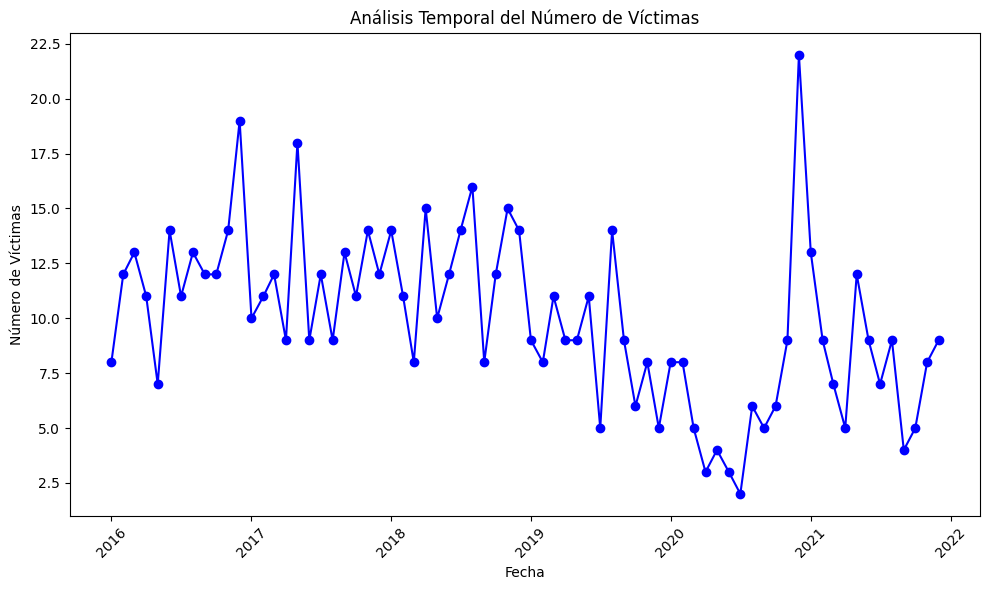

In [48]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(analisis_temporal['FECHA'], analisis_temporal['N_VICTIMAS'], marker='o', color='b')

# Añadir títulos y etiquetas
plt.title('Análisis Temporal del Número de Víctimas')
plt.xlabel('Fecha')
plt.ylabel('Número de Víctimas')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()